# Plotting Surprise for Shank

Here we load every neuron and make the plot of:
- psth
- waveform + PCA location
- maps of Strength, Direction and Latency
- Surprise for PWs
- Surprise for example binsizes all whiskers

In [1]:
%pylab inline
#%load_ext autoreload
#%autoreload 1     #option 1 to select which to reload with   %aimport display_PCAs or %aimport -display_PCAs
                 #option 0 deactivated, option 2 active for all

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from pylab import *
import matplotlib.gridspec as gridspec

import sys
sys.path.append('../functions') #this is where we put all the functions.py

from exps_files_folders import*

Expe, Vtags, Stim, rootF, stimFolder = eff()

from save_load import *
from display_psth import*
from display_surp import *
from display_lat import *
from display_map import *
from display_waveform import *
from display_PCAs import *
from get_PCA import *
from display_maps_1shank import*

../functions/display_maps_1shank.py:50: RuntimeWarning: invalid value encountered in true_divide
  Stup = np.reshape(St[:,0],(5,5)) / St.max()
../functions/display_maps_1shank.py:51: RuntimeWarning: invalid value encountered in true_divide
  Stdn = np.reshape(St[:,1],(5,5))/ St.max()
../functions/display_maps_1shank.py:52: RuntimeWarning: invalid value encountered in true_divide
  Sttot = np.reshape(St[:,0]+St[:,1],(5,5))/ St.max()
../functions/display_maps_1shank.py:53: RuntimeWarning: invalid value encountered in true_divide
  Sigtot = np.reshape(Sig[:,0]+Sig[:,1],(5,5))/ St.max()


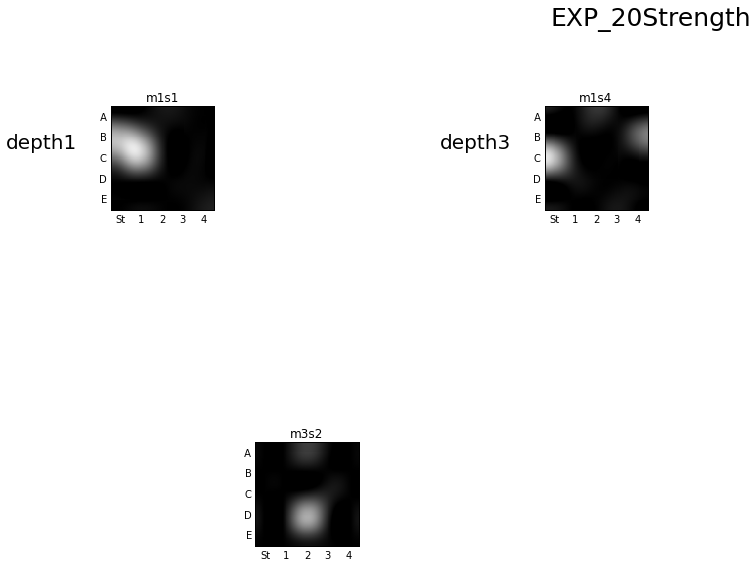

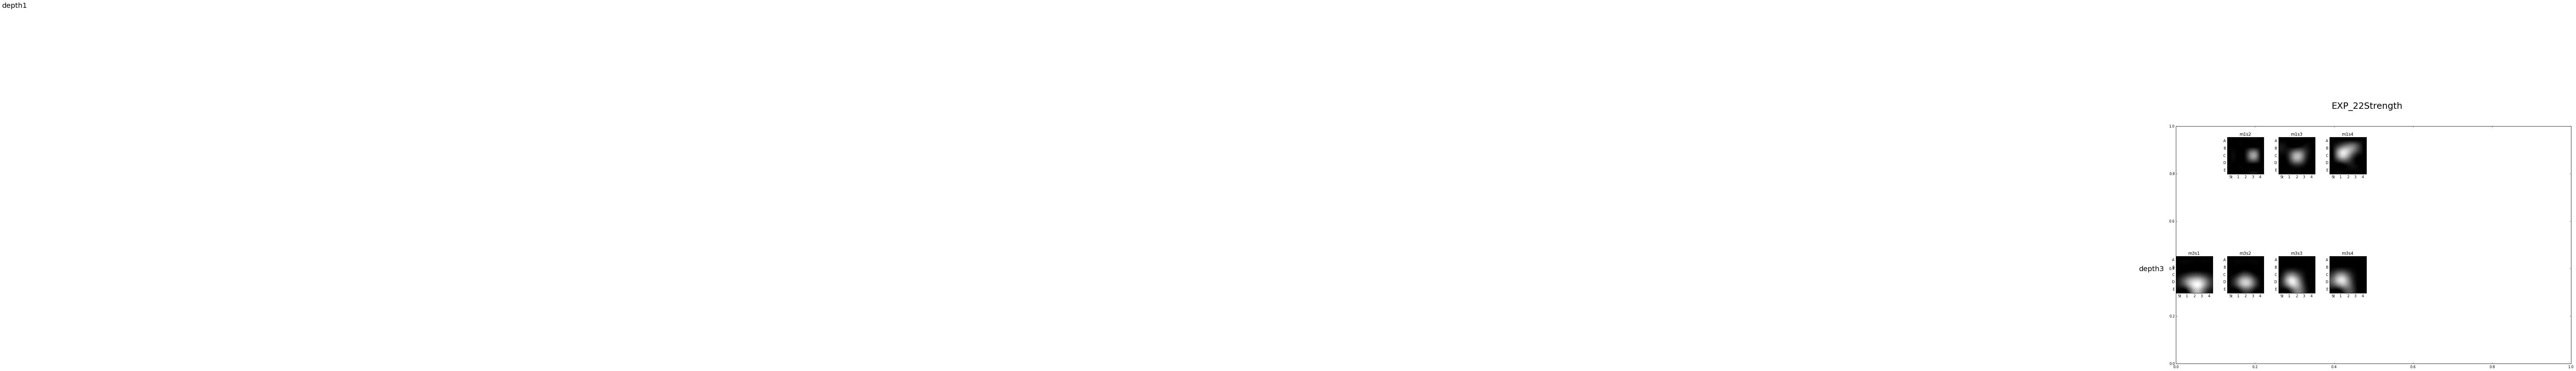

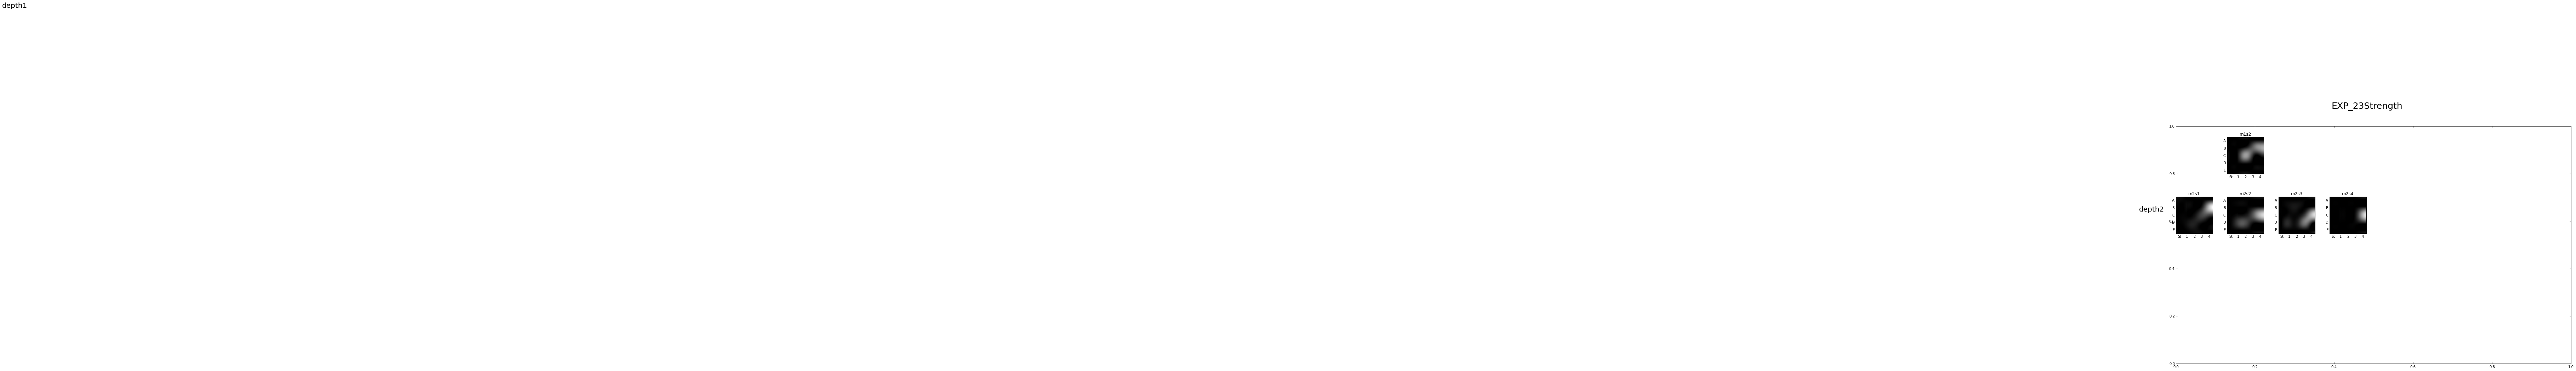

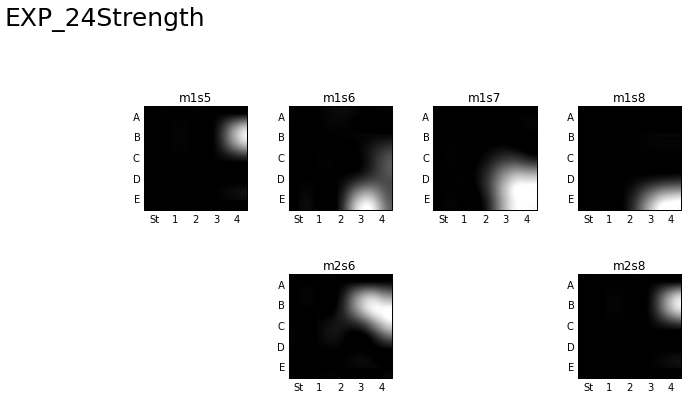

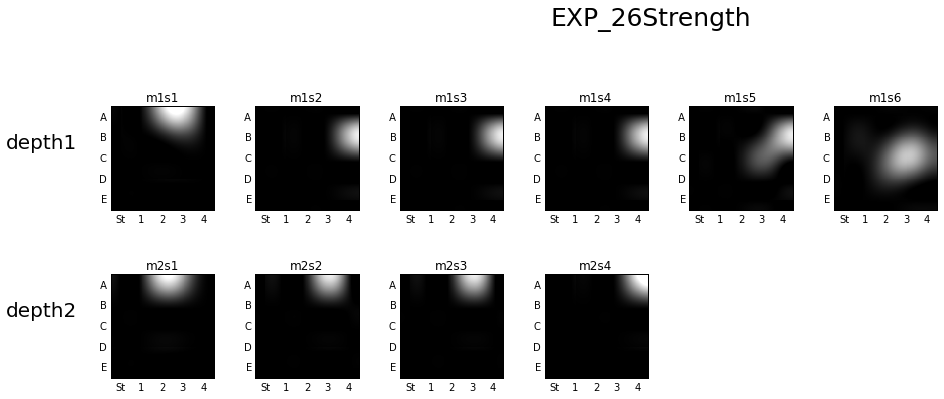

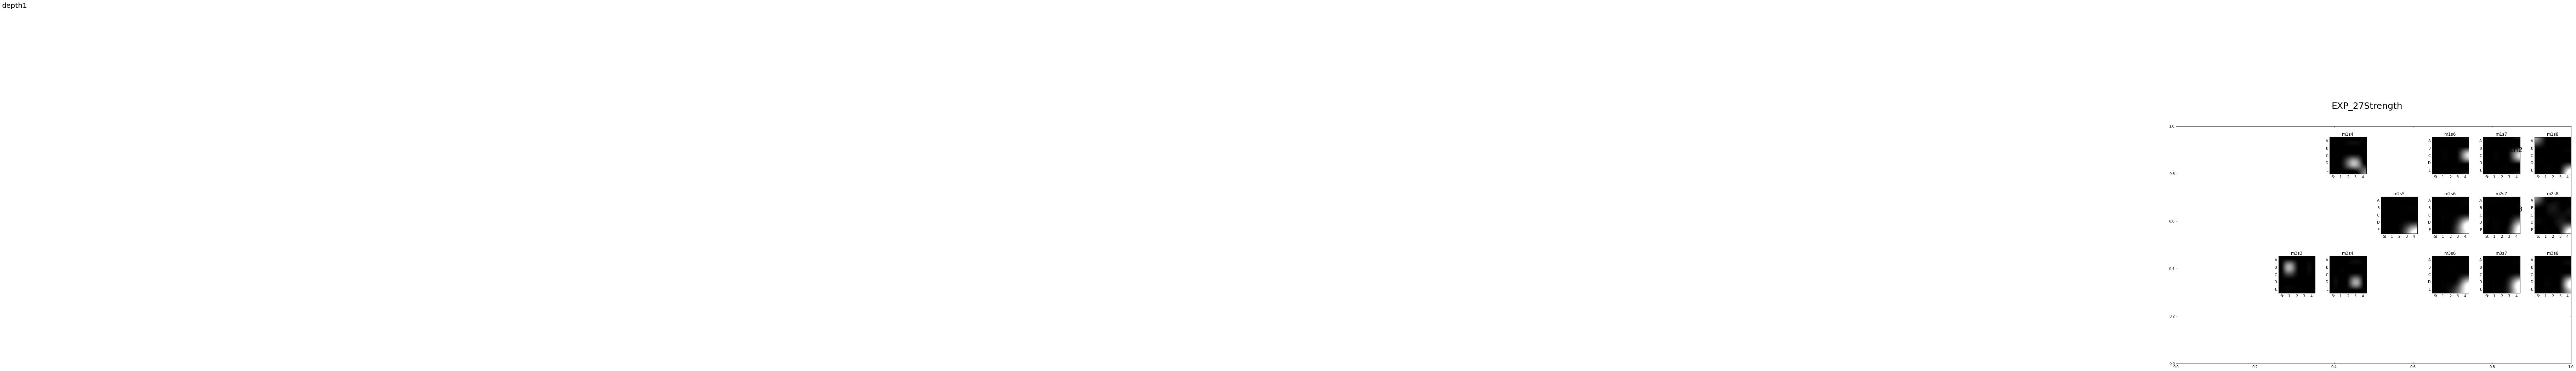

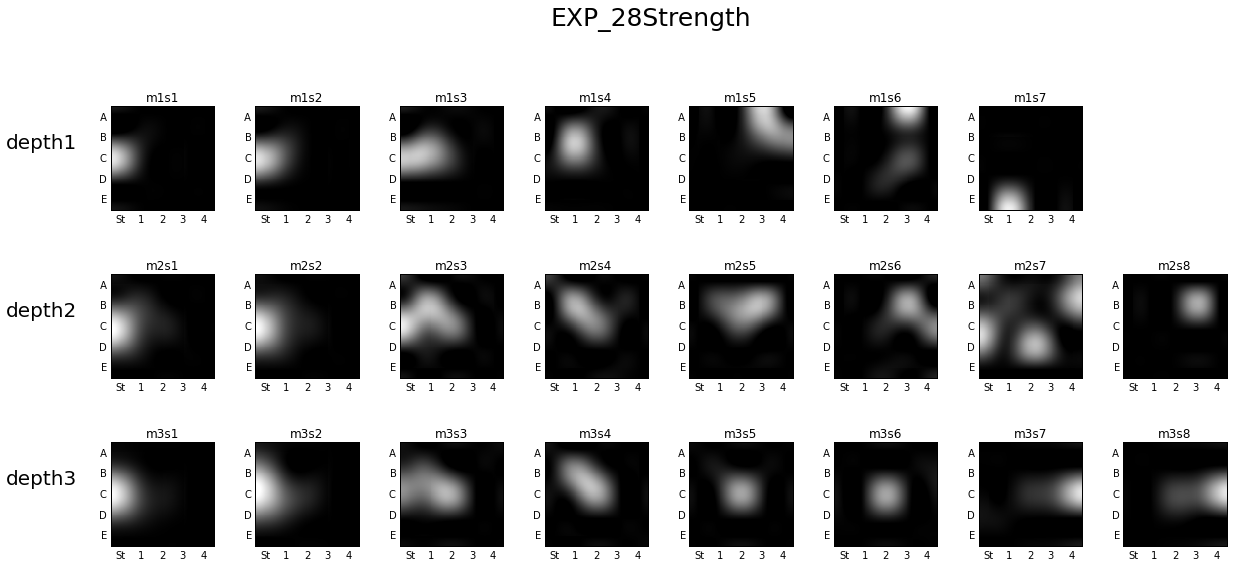

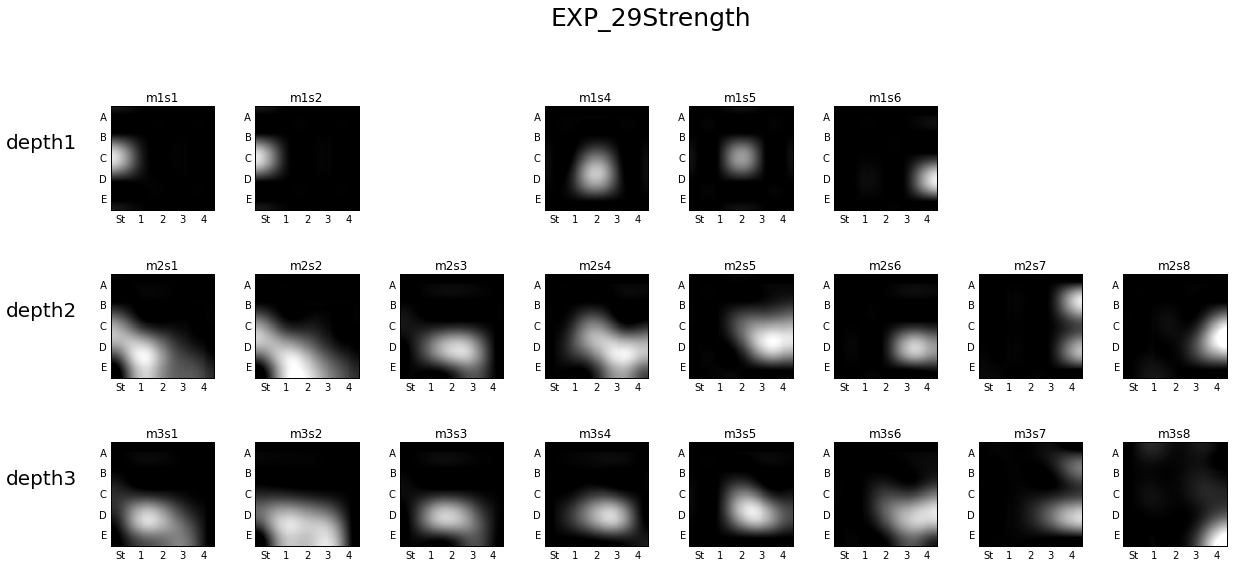

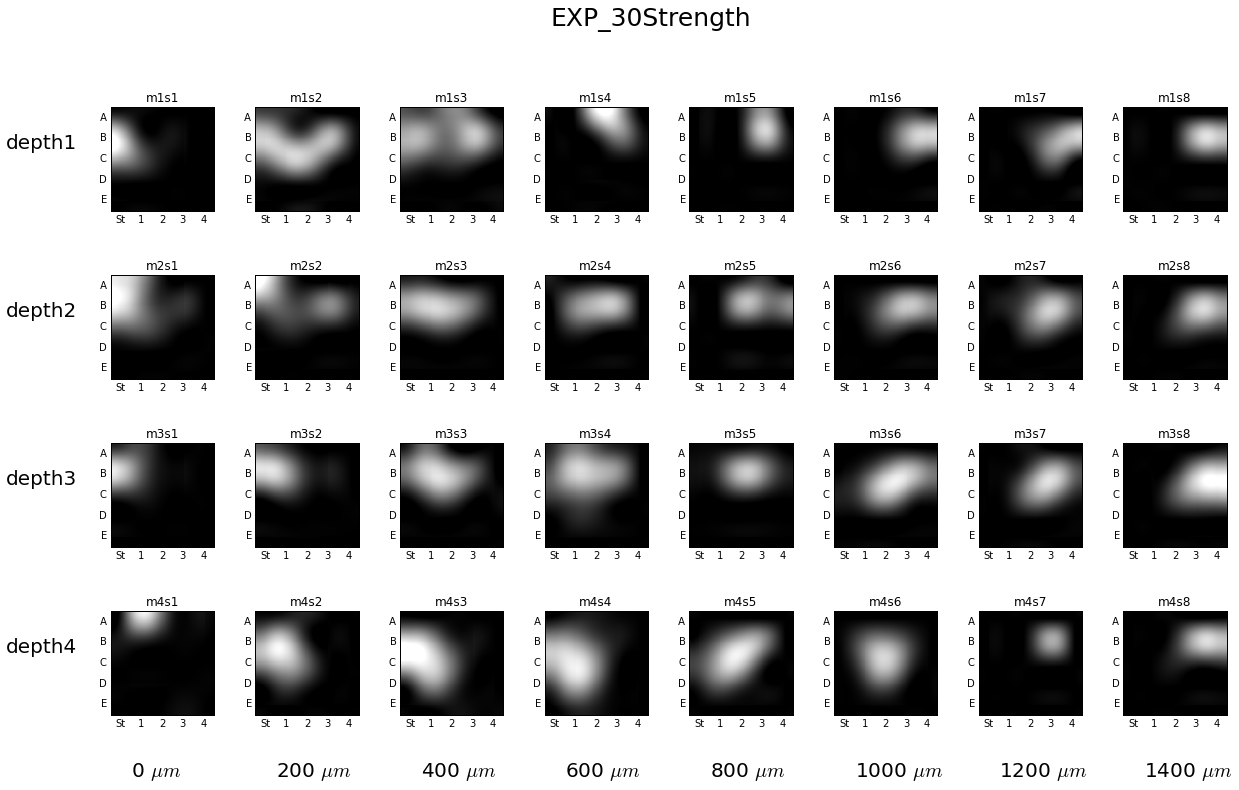

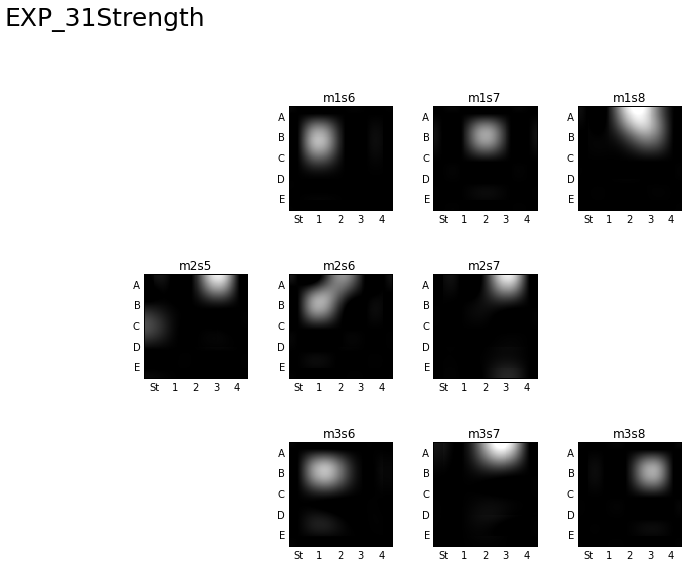

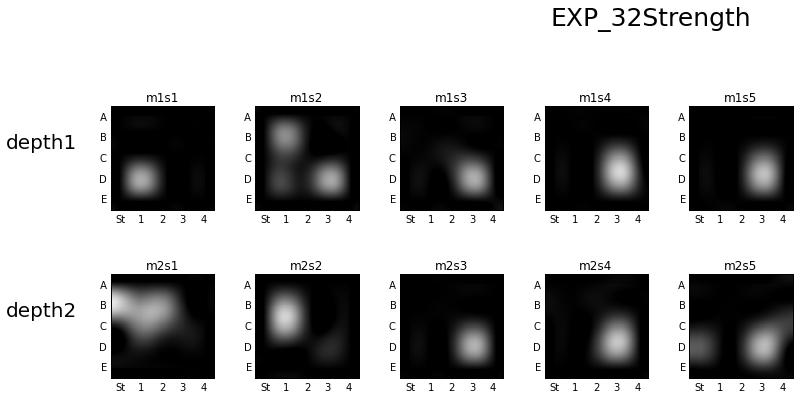

In [51]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter


#-------------------------------
# PLOTTING SURPRISE ANALYSIS
#-------------------------------
# Loading data
Folder = '/home/matias/WORKSPACE/S2_git/data'

file =Folder +'/wavedataAll'
WAVE = load_obj(file)
PCA,cl = Get_PCA(WAVE) # to get it once only  
#-------------------------------
for expe in [20,22,23,24,26,27,28,29,30,31,32]:#[20,22,23,24,26,27]:
    fig = plt.figure(figsize=(20.0,12))
    #fig = plt.figure(figsize=(12,20))
    #-------------------------------
    # Loading data
    SURP = {}
    file =Folder +'/surpdata' + str(expe)
    SURP =load_obj(file)
    
    DET = {}
    file =Folder +'/sigdata' + str(expe)
    DET =load_obj(file)
            
    wb = 20 if expe>22 else 11
    nth = 5 #this is what we used when detecting significance
    #-------------------------------
    # Data info
    idx = sort(list(SURP.keys()))
    
    fig.suptitle('EXP_'+str(expe)+'Strength',fontsize=25)
    
    outer_grid = gridspec.GridSpec(4, 8, wspace=0.4, hspace=0.015)
    for measurement in sorted(Expe[expe]):
        #print(measurement)
        #-------------------------------
        latdataTot = {}
        wavedataTot = []
        surpdataTot = {}
        stdataTot = []
        surpdataTot2 = {}

        latlabel={}
        for n in idx[:]:
            exp = SURP[n].exp
            meas = SURP[n].meas
            shank = SURP[n].shank
            # select the neurons in this shank
            ncount =0
            latdata = DET[n].latency_data

            latdataTot[n] = latdata
            latlabel[n] = [meas,shank]
            
            surpdata = SURP[n].surprise_data
            surpdataTot2[n] = surpdata
            if meas == int(measurement[1]) and shank == int(measurement[3]):
                
                #print(n)                                #select neuron here!
                ncount+=1
                #-------------------------------
                # Neuron data
                surpdata = SURP[n].surprise_data
                stdata = DET[n].detection_data.Sig_strength
                wavedata= WAVE[n]
                neuron = SURP[n].clusnum
                # gather data
                #latdataTot[n] = latdata
                #stdataTot[] = np.append(stdataTot,stdata)
                surpdataTot[n] = surpdata
        
        #reshape(latdataTot,[ncount,25,2])
        #reshape(stdataTot,[ncount,25,2]
        
# MAPS  
        outer_grid = gridspec.GridSpec(4, 8, wspace=0.4, hspace=0.015)
        gridpos = (int(measurement[1])-1)*8+int(measurement[3])-1     
        inner_grid = gridspec.GridSpecFromSubplotSpec(1,1,subplot_spec=outer_grid[gridpos], wspace=0.1, hspace=0.1)
        display_mapsShank(surpdataTot,latdataTot,DET, fig, inner_grid,expe,measurement)
        #display_mapsDirection(surpdataTot,latdataTot,DET, fig, inner_grid,expe,measurement)

# LATENCY
    #outer_grid = gridspec.GridSpec(1, 1, wspace=0.5, hspace=0.5)
    #gridpos = (int(measurement[1]))+(int(measurement[3])-1)*4-1     
    #inner_grid = gridspec.GridSpecFromSubplotSpec(1,1,subplot_spec=outer_grid[0], wspace=0.1, hspace=0.1)
    #display_latenciesShank(surpdataTot2,latdataTot,latlabel, fig, inner_grid,measurement)

        
        if measurement[3]== '1':
           text(-5.5,1.5, 'depth' + measurement[1],size = 20) 
        if measurement[1]== '4' :
           text(0.5,7.5, str(200*(int(measurement[3])-1))+ " $\mu m$" ,size = 20) 
            
# WAVE
        #inner_grid = gridspec.GridSpecFromSubplotSpec(2,2,subplot_spec=outer_grid[2], wspace=0.4, hspace=0.6)
        #display_wave(wavedata, fig, inner_grid)
        #display_PCA(PCA,cl,WAVE[n].PCA_wave, fig, inner_grid)

    #-------------------------------
    #PDFfile = '/home/matias/WORKSPACE/OUTPUT/Surprise/Exp'+ str(expe) +'_'+ measurement + '_Latencies.pdf'
    PDFfile = '/home/matias/WORKSPACE/OUTPUT/Surprise/Exp'+ str(expe) +'_mapsStrength.pdf'

    fig.savefig(PDFfile , format='pdf')  
    #close(fig)

In [45]:
#DET[n].detection_data.keys()
#plot(DET[n].detection_data[0][20][0])
np.max(DET[n].detection_data.Sig_strength,axis=1)*DET[n].detection_data.Sig_strength[:,0]

array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,  19044.,
            0.,      0.,      0.,      0.,      0.,    576.,      0.,
            0.,      0.,      0.,      0.])